In [1]:
pip install quandl

In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from datetime import datetime, date
import quandl

In [3]:
assets = ['AAPL',       # Apple
          'KO',         # Coca-Cola
          'DIS',        # Disney
          'XOM',        # Exxon Mobil
          'JPM',        # JPMorgan Chase
          'MCD',        # McDonald's
          'WMT']         # Walmart

In [4]:
# download historical data from quandl
hist_data = {}
for asset in assets:
    data = quandl.get('wiki/'+asset, start_date='2018-01-01', end_date='2023-12-31', authtoken='KspFRH5bTmDmGmssFYMx')
    hist_data[asset] = data['Adj. Close']
hist_data = pd.concat(hist_data, axis=1)

In [5]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-01-02,99.30,99.7900,98.5200,98.59,10065263.0,0.0,1.0,99.30,99.7900,98.5200,98.59,10065263.0
2018-01-03,98.85,100.0000,98.7700,99.45,8898909.0,0.0,1.0,98.85,100.0000,98.7700,99.45,8898909.0
2018-01-04,99.54,99.7800,98.9110,99.54,6805321.0,0.0,1.0,99.54,99.7800,98.9110,99.54,6805321.0
2018-01-05,99.64,100.3800,99.6100,100.13,7202992.0,0.0,1.0,99.64,100.3800,99.6100,100.13,7202992.0
2018-01-08,100.25,101.7500,100.2100,101.61,8277421.0,0.0,1.0,100.25,101.7500,100.2100,101.61,8277421.0
2018-01-09,102.03,102.3500,100.3100,100.39,7296463.0,0.0,1.0,102.03,102.3500,100.3100,100.39,7296463.0
2018-01-10,99.75,99.8900,98.5300,99.67,7615940.0,0.0,1.0,99.75,99.8900,98.5300,99.67,7615940.0
2018-01-11,99.70,100.4500,98.7800,100.02,6527026.0,0.0,1.0,99.70,100.4500,98.7800,100.02,6527026.0
2018-01-12,100.39,101.4400,100.3000,100.87,6907217.0,0.0,1.0,100.39,101.4400,100.3000,100.87,6907217.0


In [6]:
# calculate historical log returns
hist_return = np.log(hist_data / hist_data.shift())
hist_return = hist_return.dropna()


In [7]:
# find historical mean, covriance, and correlation
hist_mean = hist_return.mean(axis=0).to_frame()
hist_mean.columns = ['mu']
hist_cov = hist_return.cov()
hist_corr = hist_return.corr()
print(hist_mean.transpose())
print(hist_cov)
print(hist_corr)

        AAPL        KO       DIS       XOM       JPM       MCD       WMT
mu -0.000397 -0.001034 -0.002034 -0.002466  0.000035 -0.001642 -0.002346
          AAPL        KO       DIS       XOM       JPM       MCD       WMT
AAPL  0.000282  0.000095  0.000137  0.000127  0.000183  0.000114  0.000111
KO    0.000095  0.000117  0.000085  0.000099  0.000105  0.000081  0.000125
DIS   0.000137  0.000085  0.000196  0.000142  0.000163  0.000104  0.000116
XOM   0.000127  0.000099  0.000142  0.000229  0.000148  0.000098  0.000131
JPM   0.000183  0.000105  0.000163  0.000148  0.000262  0.000146  0.000138
MCD   0.000114  0.000081  0.000104  0.000098  0.000146  0.000208  0.000105
WMT   0.000111  0.000125  0.000116  0.000131  0.000138  0.000105  0.000385
          AAPL        KO       DIS       XOM       JPM       MCD       WMT
AAPL  1.000000  0.523771  0.582457  0.501408  0.672507  0.468861  0.335115
KO    0.523771  1.000000  0.561490  0.604170  0.597027  0.517961  0.585858
DIS   0.582457  0.561490  1.0

In [11]:
# construct random portfolios
n_portfolios = 5000
#set up array to hold results
port_returns = np.zeros(n_portfolios)
port_stdevs = np.zeros(n_portfolios)
for i in range(n_portfolios):
    w = np.random.rand(len(assets))        # random weights
    w = w / sum(w)                         # weights sum to 1
    port_return = np.dot(w.T, hist_mean.values) * 250         # annualize; 250 business days
    port_stdev = np.sqrt(np.dot(w.T, np.dot(hist_cov, w))) * np.sqrt(250)  # annualize; 250 business days
    port_returns[i] = port_return
    port_stdevs[i] = port_stdev


<ipython-input-11-76cd4227c945>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  port_returns[i] = port_return


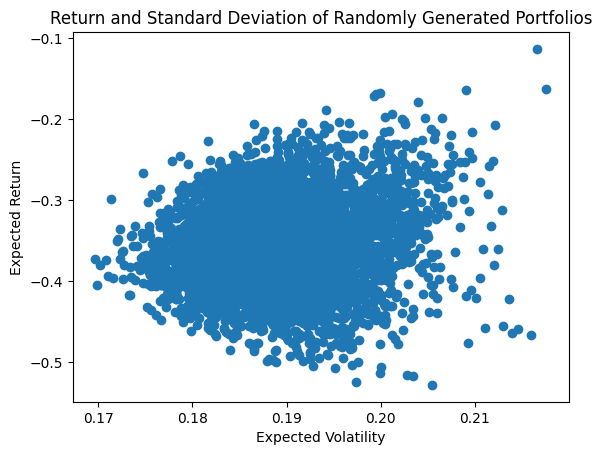

       AAPL        KO       DIS       XOM       JPM       MCD       WMT
0  0.049257  0.714137  0.217066  0.025511 -0.167946  0.211624 -0.049649
0.1604140396091394


In [12]:
plt.plot(port_stdevs, port_returns, 'o', markersize=6)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Return and Standard Deviation of Randomly Generated Portfolios')
plt.show()

# Global Minimum Variance (GMV) -- closed form
hist_cov_inv = - np.linalg.inv(hist_cov)
one_vec = np.ones(len(assets))
w_gmv = np.dot(hist_cov_inv, one_vec) / (np.dot(np.transpose(one_vec), np.dot(hist_cov_inv, one_vec)))
w_gmv_df = pd.DataFrame(data = w_gmv).transpose()
w_gmv_df.columns = assets
stdev_gmv = np.sqrt(np.dot(w_gmv.T, np.dot(hist_cov, w_gmv))) * np.sqrt(250)
print(w_gmv_df)
print(stdev_gmv)


In [13]:
# Global Minimum Variance (GMV) -- closed form
hist_cov_inv = - np.linalg.inv(hist_cov)
one_vec = np.ones(len(assets))
w_gmv = np.dot(hist_cov_inv, one_vec) / (np.dot(np.transpose(one_vec), np.dot(hist_cov_inv, one_vec)))
w_gmv_df = pd.DataFrame(data = w_gmv).transpose()
w_gmv_df.columns = assets
stdev_gmv = np.sqrt(np.dot(w_gmv.T, np.dot(hist_cov, w_gmv))) * np.sqrt(250)
print(w_gmv_df)
print(stdev_gmv)

       AAPL        KO       DIS       XOM       JPM       MCD       WMT
0  0.049257  0.714137  0.217066  0.025511 -0.167946  0.211624 -0.049649
0.1604140396091394


In [15]:
# Global Minimum Variance (GMV) -- numerical
P = matrix(hist_cov.values)
q = matrix(np.zeros((len(assets), 1)))
A = matrix(1.0, (1, len(assets)))
b = matrix(1.0)
w_gmv_v2 = np.array(solvers.qp(P, q, A=A, b=b)['x'])
w_gmv_df_v2 = pd.DataFrame(w_gmv_v2).transpose()
w_gmv_df_v2.columns = assets
stdev_gmv_v2 = np.sqrt(np.dot(w_gmv_v2.T, np.dot(hist_cov, w_gmv_v2))) * np.sqrt(250)
print(w_gmv_df_v2)
print(stdev_gmv_v2.item())



       AAPL        KO       DIS       XOM       JPM       MCD       WMT
0  0.049257  0.714137  0.217066  0.025511 -0.167946  0.211624 -0.049649
0.1604140396091395


In [17]:
# Maximum return -- closed form
mu_o = np.max(hist_mean).item()   # MCD
A = np.matrix([[np.dot(hist_mean.T, np.dot(hist_cov_inv, hist_mean)).item(),
                np.dot(hist_mean.T, np.dot(hist_cov_inv, one_vec)).item()],
               [np.dot(hist_mean.T, np.dot(hist_cov_inv, one_vec)).item(),
                np.dot(one_vec.T, np.dot(hist_cov_inv, one_vec)).item()]])
B = np.hstack([np.array(hist_mean), one_vec.reshape(len(assets), 1)])
y = np.matrix([mu_o, 1]).T
w_max_ret = np.dot(np.dot(np.dot(hist_cov_inv, B), np.linalg.inv(A)), y)
w_max_ret_df = pd.DataFrame(w_max_ret).T
w_max_ret_df.columns = assets
print(w_max_ret_df)

# Maximum return -- numerical
P = matrix(hist_cov.values)
q = matrix(np.zeros((len(assets), 1)))
A = matrix(np.hstack([np.array(hist_mean), one_vec.reshape(len(assets), 1)]).transpose())
b = matrix([mu_o, 1])
w_max_ret_v2 = np.array(solvers.qp(P, q, A=A, b=b)['x'])
w_max_ret_df_v2 = pd.DataFrame(w_max_ret_v2).transpose()
w_max_ret_df_v2.columns = assets
print(w_max_ret_df_v2)


       AAPL        KO      DIS       XOM       JPM       MCD       WMT
0  0.121194  1.032864 -0.08151 -0.249387  0.320716  0.030519 -0.174395
       AAPL        KO      DIS       XOM       JPM       MCD       WMT
0  0.121194  1.032864 -0.08151 -0.249387  0.320716  0.030519 -0.174395


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [21]:
# efficient frontier
N = 100
ef_left = min(hist_mean.values).item()          # minimum return
ef_right = max(hist_mean.values).item()         # maximum return
target_returns = np.linspace(ef_left, ef_right, N)         # N target returns
optimal_weights = [solvers.qp(P, q, A=A, b=matrix([t, 1]))['x'] for t in target_returns]    # QP solver
ef_returns = [np.dot(w.T, hist_mean.values).item() * 250 for w in optimal_weights]  # annualized
ef_risks = [np.sqrt(np.dot(w.T, np.dot(hist_cov, w)) * 250).item() for w in optimal_weights]


<ipython-input-22-bb4e5d9b9012>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y-o" (-> color='y'). The keyword argument will take precedence.
  plt.plot(ef_risks, ef_returns, 'y-o', markersize=8, label='Efficient Frontier', color='green')


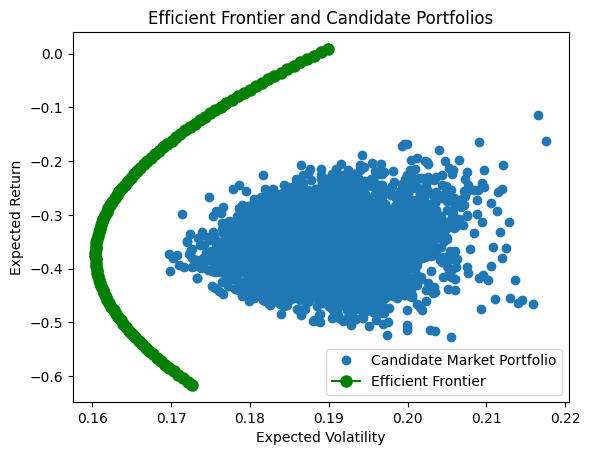

In [22]:
plt.plot(port_stdevs, port_returns, 'o', markersize=6, label='Candidate Market Portfolio')
plt.plot(ef_risks, ef_returns, 'y-o', markersize=8, label='Efficient Frontier', color='green')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Candidate Portfolios')
plt.legend(loc='best')
plt.show()


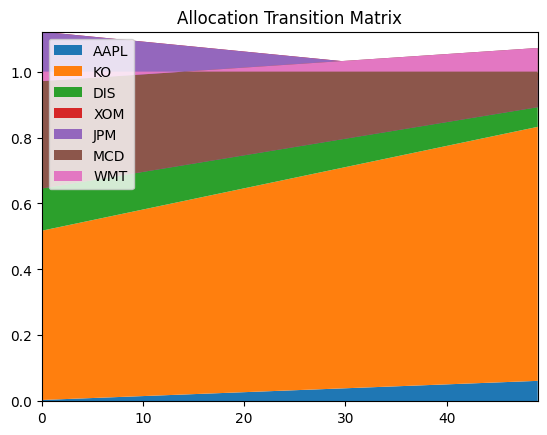

       AAPL        KO       DIS       XOM      JPM       MCD       WMT
0 -0.129367 -0.077285  0.958454  0.708104 -1.38133  0.661321  0.260104
[[-1.32718398]]
[[0.29904083]]
[[-4.47157653]]


In [24]:
transition_data = pd.DataFrame(optimal_weights)
transition_data.columns = assets
plt.stackplot(range(50), transition_data.iloc[:50, :].T, labels=assets)  # the other half has negative weights
plt.legend(loc='upper left')
plt.margins(0, 0)
plt.title('Allocation Transition Matrix')
plt.show()

# Maximum sharpe -- closed form
r_f = 0.01
w_sharpe = np.dot(hist_cov_inv, hist_mean.values - r_f / 250) / np.dot(one_vec, np.dot(hist_cov_inv, hist_mean.values - r_f / 250))
w_sharpe_df = pd.DataFrame(w_sharpe).T
w_sharpe_df.columns = assets
print(w_sharpe_df)
mu_sharpe = np.dot(w_sharpe.T, hist_mean.values) * 250
print(mu_sharpe)
stdev_sharpe = np.sqrt(np.dot(w_sharpe.T, np.dot(hist_cov, w_sharpe))) * np.sqrt(250)
print(stdev_sharpe)
sharpe_ratio = (mu_sharpe - r_f) / stdev_sharpe
print(sharpe_ratio)


In [26]:
from scipy.optimize import minimize

fun = lambda w: -1 * np.dot(w.T, hist_mean.values * 250 - r_f) / np.sqrt(np.dot(w.T, np.dot(hist_cov * 250, w)))
cons = ({'type': 'eq', 'fun': lambda w:  np.dot(w.T, one_vec) - 1})
res = minimize(fun, w_gmv, method='SLSQP', constraints=cons)
w_sharpe_v2 = res['x']
w_sharpe_v2_df = pd.DataFrame(w_sharpe_v2).T
w_sharpe_v2_df.columns = assets
print(w_sharpe_v2_df)
mu_sharpe_v2 = np.dot(w_sharpe_v2.T, hist_mean.values) * 250
print(mu_sharpe_v2)
stdev_sharpe_v2 = np.sqrt(np.dot(w_sharpe_v2.T, np.dot(hist_cov, w_sharpe_v2))) * np.sqrt(250)
print(stdev_sharpe_v2)
sharpe_ratio_v2 = (mu_sharpe_v2 - r_f) / stdev_sharpe_v2
print(sharpe_ratio_v2)


         AAPL           KO          DIS          XOM          JPM  \
0 -166.999463  4944.299384 -3891.890004 -2656.891988  6567.370253   

           MCD          WMT  
0 -2624.652543 -2170.235639  
[4763.37470708]
1294.1799714403662
[3.68060456]
